In [1]:
import json
import csv
import tweepy
import re
import nltk
from nltk.stem import WordNetLemmatizer
import pandas as pd
import GetOldTweets3 as got
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
import numpy as np

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from textwrap import wrap
import plotly_express as px

In [12]:
# Set default fontsize and colors for graphs
SMALL_SIZE, MEDIUM_SIZE, BIG_SIZE = 10, 12, 20
plt.rc('font', size=MEDIUM_SIZE)       
plt.rc('axes', titlesize=BIG_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)  
plt.rc('xtick', labelsize=MEDIUM_SIZE) 
plt.rc('ytick', labelsize=MEDIUM_SIZE) 
plt.rc('legend', fontsize=SMALL_SIZE)  
plt.rc('figure', titlesize=BIG_SIZE)
my_colors = 'rgbkymc'

# Disable scrolling for long output
from IPython.display import display, Javascript
disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""
display(Javascript(disable_js))

<IPython.core.display.Javascript object>

In [2]:
df=pd.read_csv('../Datasets/wfh.csv')

In [3]:
df

,Unnamed: 0,hashtags,timestamp,text,screen_name,likes,retweets
0,0,[],2020-01-31 11:54:20,@livspace - Bangalore team confirmed delivery ...,SerikarAravind,0,2
1,1,[],2020-01-30 08:30:20,Hiring for HR Recruiter WFH | Disruptive HR St...,myunnati,0,0
2,2,"['bangaloretraffic', 'Bangalore']",2020-01-30 07:16:40,Hoping either the policies will change or comp...,Gundammatha,0,0
3,3,[],2020-01-31 11:54:20,@livspace - Bangalore team confirmed delivery ...,SerikarAravind,0,2
4,4,[],2020-01-30 08:30:20,Hiring for HR Recruiter WFH | Disruptive HR St...,myunnati,0,0
5,5,"['bangaloretraffic', 'Bangalore']",2020-01-30 07:16:40,Hoping either the policies will change or comp...,Gundammatha,0,0
6,6,"['MiddleMgmtNeedTraining', 'CanDoBetter']",2020-01-14 13:50:10,My frnd spends ~4hrs in Bangalore traffic ever...,rakshith28,0,0
7,7,"['MiddleMgmtNeedTraining', 'CanDoBetter']",2020-01-14 13:50:10,My frnd spends ~4hrs in Bangalore traffic ever...,rakshith28,0,0
8,8,[],2020-02-26 13:20:18,If you come to Bangalore you're getting the as...,_theapologist,0,0
9,9,[],2020-02-20 16:05:38,Swine flu back to haunt Bangalore. SAP shuts o...,Yoiii,2,0


In [6]:
df=df.drop(['Unnamed: 0'],axis=1)

In [7]:
df=df.drop_duplicates()
df=df.reset_index()

In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
df['compound'] = [analyzer.polarity_scores(v)['compound'] for v in df['text']]

In [9]:
#classifying sentiments as positive,negative and neutral
def sentiment(compound):
    res = ""
    if(compound >= 0.05):
        res="Positive"
    elif(compound <= - 0.05):
        res="Negative"
    else:
        res="Neutral"
    return res

df['Sentiment'] = df['compound'].apply(lambda x: sentiment(x))

In [10]:
df

,index,hashtags,timestamp,text,screen_name,likes,retweets,compound,Sentiment
0,0,[],2020-01-31 11:54:20,@livspace - Bangalore team confirmed delivery ...,SerikarAravind,0,2,0.0000,Neutral
1,1,[],2020-01-30 08:30:20,Hiring for HR Recruiter WFH | Disruptive HR St...,myunnati,0,0,-0.3182,Negative
2,2,"['bangaloretraffic', 'Bangalore']",2020-01-30 07:16:40,Hoping either the policies will change or comp...,Gundammatha,0,0,0.2942,Positive
3,6,"['MiddleMgmtNeedTraining', 'CanDoBetter']",2020-01-14 13:50:10,My frnd spends ~4hrs in Bangalore traffic ever...,rakshith28,0,0,0.1511,Positive
4,8,[],2020-02-26 13:20:18,If you come to Bangalore you're getting the as...,_theapologist,0,0,-0.5423,Negative
5,9,[],2020-02-20 16:05:38,Swine flu back to haunt Bangalore. SAP shuts o...,Yoiii,2,0,-0.6908,Negative
6,10,[],2020-02-20 09:25:29,Received a forward on WA about H1N1 case detec...,ammapakoda,0,0,0.5588,Positive
7,14,['Christmas'],2020-01-09 06:09:30,"This vacation has been about working in India,...",TupTamizha,0,0,0.5972,Positive
8,15,[],2020-01-08 18:52:29,Just got WFH but no effect.. BAU across whole...,unix4u,0,0,-0.4215,Negative
9,16,['DesiLife'],2020-01-06 08:53:00,Lunch was Tomato bath and some chips. Thats it...,TupTamizha,0,0,0.3802,Positive


In [13]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

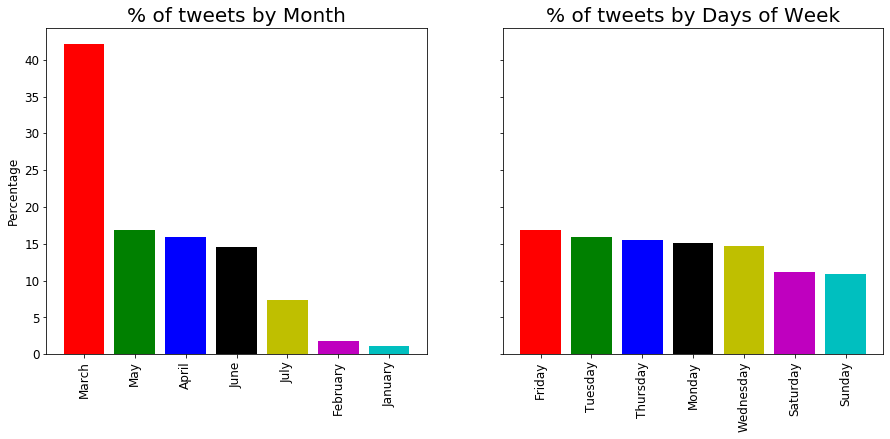

In [16]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
df["monthName"] = df.timestamp.dt.month_name()
data = df["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of tweets by Month')

df["dayName"] = df.timestamp.dt.day_name()
data = df["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of tweets by Days of Week')

plt.show()

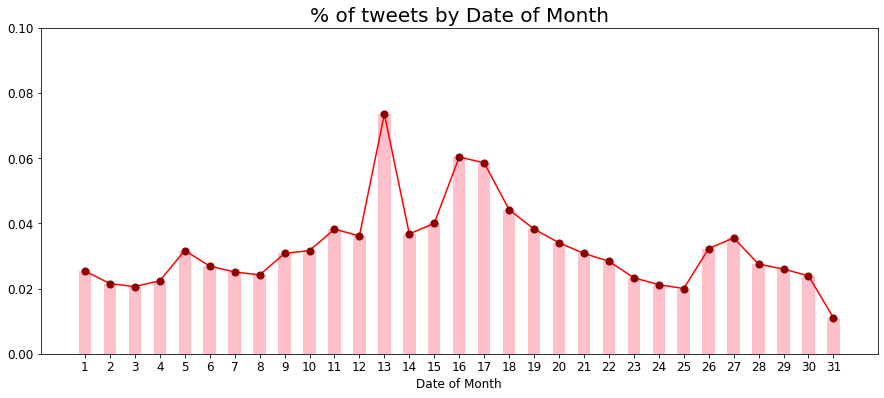

In [17]:
fig, axes = plt.subplots(figsize=(15,6))
df["dayOfMonth"] = df.timestamp.dt.day
data = df["dayOfMonth"].value_counts(normalize=True).sort_index()
axes.bar(data.index, data, color='pink', width=0.5, zorder=0)
axes.plot(data.index, data, color='red', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Date of Month')
axes.set_xticks(np.arange(1, 32))
axes.set_xticklabels([str(val) for val in np.arange(1, 32)])
axes.set_ylim(0, 0.1)
axes.set_title('% of tweets by Date of Month')

plt.show()

In [18]:
import string
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    nopunc = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', text_rc) #remove urls
    nopunc = re.sub(r'http\S+', '', nopunc) #remove usernames
    nopunc = re.sub(r'#([^\s]+)', r'\1', nopunc) #remove hashtags
    nopunc= re.sub(r'(.)\1+', r'\1\1', nopunc)  #remove repeating characters 
    tokens = re.split('\W+', nopunc)    # tokenization
    text = [word for word in tokens if word not in stopwords]  # remove stopwords and stemming
    return text
df['Text_cleaned'] = df['text'].apply(lambda x: clean_text(x))

In [20]:
pos_df=df[df.Sentiment=='Positive']
neg_df=df[df.Sentiment=='Negative']
neu_df=df[df.Sentiment=='Neutral']

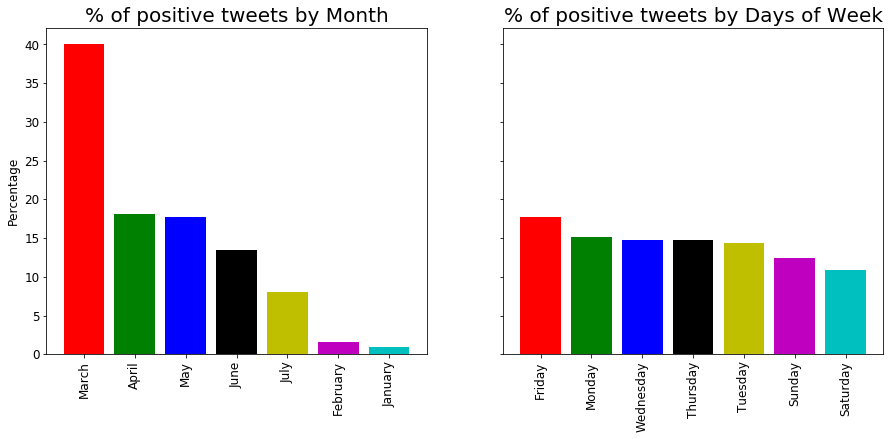

In [21]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
data = pos_df["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of positive tweets by Month')

data = pos_df["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of positive tweets by Days of Week')

plt.show()

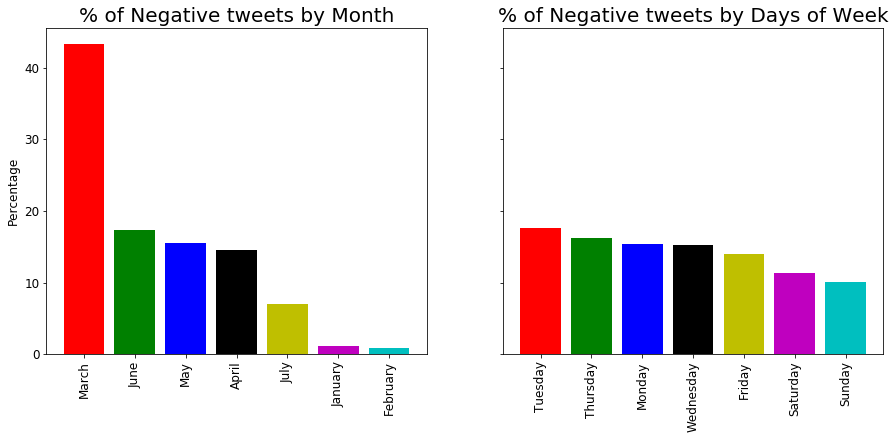

In [22]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
data = neg_df["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of Negative tweets by Month')

data = neg_df["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of Negative tweets by Days of Week')

plt.show()

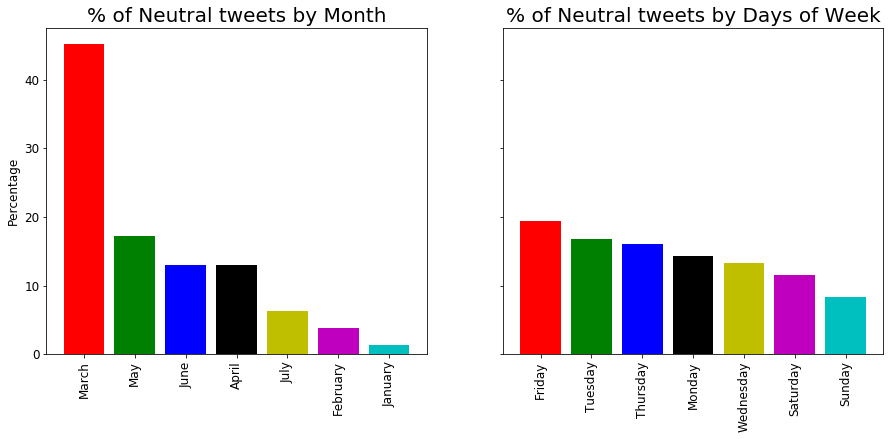

In [23]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
data = neu_df["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of Neutral tweets by Month')

data = neu_df["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of Neutral tweets by Days of Week')

plt.show()

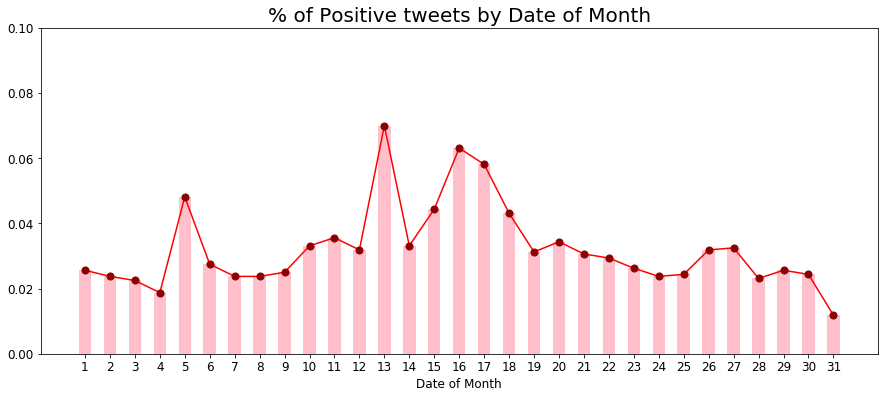

In [24]:
fig, axes = plt.subplots(figsize=(15,6))
data = pos_df["dayOfMonth"].value_counts(normalize=True).sort_index()
axes.bar(data.index, data, color='pink', width=0.5, zorder=0)
axes.plot(data.index, data, color='red', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Date of Month')
axes.set_xticks(np.arange(1, 32))
axes.set_xticklabels([str(val) for val in np.arange(1, 32)])
axes.set_ylim(0, 0.1)
axes.set_title('% of Positive tweets by Date of Month')

plt.show()

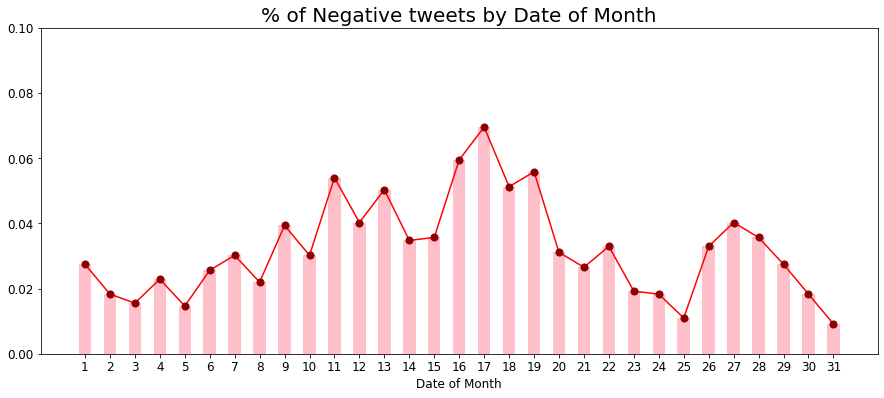

In [25]:
fig, axes = plt.subplots(figsize=(15,6))
data = neg_df["dayOfMonth"].value_counts(normalize=True).sort_index()
axes.bar(data.index, data, color='pink', width=0.5, zorder=0)
axes.plot(data.index, data, color='red', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Date of Month')
axes.set_xticks(np.arange(1, 32))
axes.set_xticklabels([str(val) for val in np.arange(1, 32)])
axes.set_ylim(0, 0.1)
axes.set_title('% of Negative tweets by Date of Month')

plt.show()

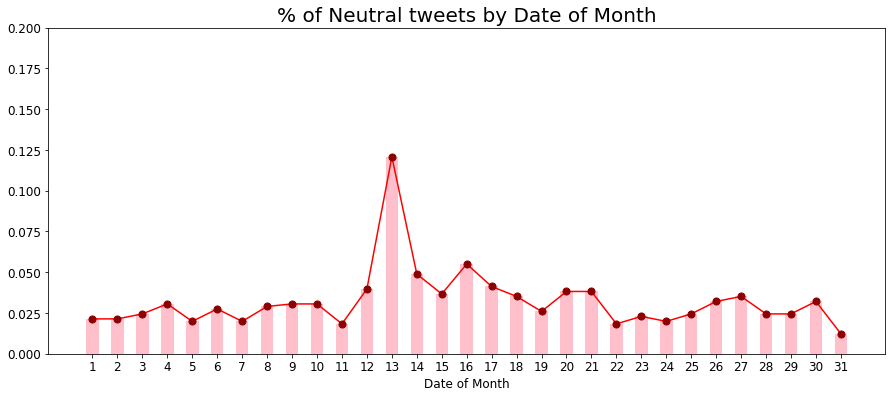

In [27]:
fig, axes = plt.subplots(figsize=(15,6))
data = neu_df["dayOfMonth"].value_counts(normalize=True).sort_index()
axes.bar(data.index, data, color='pink', width=0.5, zorder=0)
axes.plot(data.index, data, color='red', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Date of Month')
axes.set_xticks(np.arange(1, 32))
axes.set_xticklabels([str(val) for val in np.arange(1, 32)])
axes.set_ylim(0, 0.2)
axes.set_title('% of Neutral tweets by Date of Month')

plt.show()